In [8]:
using LinearAlgebra 
using Kronecker
using MKL
using Plots, PyPlot
using Random, Distributions
using RandomMatrices
using CSV, Tables

In [2]:
X = [0 1 ; 1 0 ];
Y = [0 -1im ; im 0 ];
Z = [1 0 ; 0 -1 ];


H=1/sqrt(2)*[1 1 ; 1 -1];

S=[1 0; 0 im];
T=[1 0; 0 exp(im*pi/4)];



function RX(r)
    exp(-im*r/2*X)
end

function RY(r)
    exp(-im*r/2*Y)
end

function RZ(r)
    exp(-im*r/2*Z)
end


CNOT=[1 0 0 0; 0 1 0 0; 0 0 0 1; 0 0 1 0];
REVCNOT=kronecker(H, H)*CNOT*kronecker(H, H);


In [3]:
#Generating a stack of Random Unitary


RH1=fill(fill(0.1+im, 2,2), 12);
RU=fill(fill(0.1+im, 2,2), 12);

#Generating a GUE:

l = Normal(0, 0.50);   #off diagonal elements
d = Normal(0, 1.00);   #diagonal elements


for j in 1:length(RU)
    
    
    A=rand(l,2,2)+im*rand(l,2,2);
    for i in 1:dim(A)
        A[i,i]=rand(d)+im*rand(d);
    end
    
#Symmetrisation and Exponentiation:
    
    
    RH1[j]=(A+A')/2;
    RU[j]=exp(im*RH1[j]);
    
end

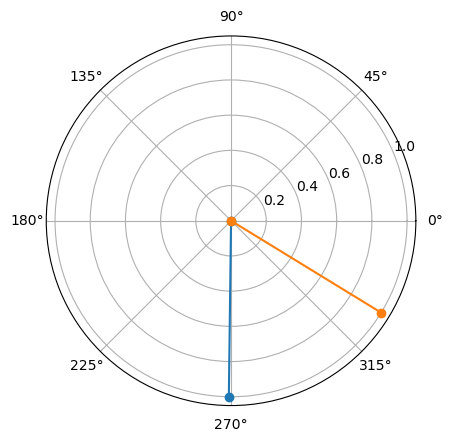

2-element Vector{Vector{PyCall.PyObject}}:
 [PyObject <matplotlib.lines.Line2D object at 0x00000000AA17E620>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000AA17FD00>]

In [9]:
#Checking the proposition numerically for the 1 qubit case:

EigA=eigvals(RU[1]);
polar.(Base.vect.(0.0,angle.(EigA)),Base.vect.(0.0,abs.(EigA)),marker="o")

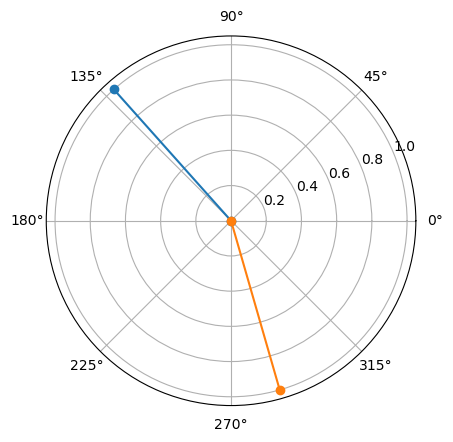

2-element Vector{Vector{PyCall.PyObject}}:
 [PyObject <matplotlib.lines.Line2D object at 0x00000000AC3D4EB0>]
 [PyObject <matplotlib.lines.Line2D object at 0x00000000AC3D5030>]

In [12]:
EigXA=eigvals(X*RU[1]);
polar.(Base.vect.(0.0,angle.(EigXA)),Base.vect.(0.0,abs.(EigXA)),marker="o")

In [15]:
a=sqrt(EigA[1]*EigA[2]);
EigXA2=[-a,a]

2-element Vector{ComplexF64}:
 -0.48325804026963776 + 0.8754779646083323im
  0.48325804026963776 - 0.8754779646083323im

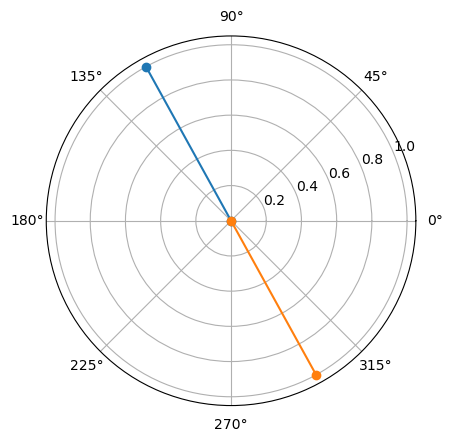

2-element Vector{Vector{PyCall.PyObject}}:
 [PyObject <matplotlib.lines.Line2D object at 0x000000006EC48BB0>]
 [PyObject <matplotlib.lines.Line2D object at 0x000000006EC49C90>]

In [16]:
polar.(Base.vect.(0.0,angle.(EigXA2)),Base.vect.(0.0,abs.(EigXA2)),marker="o")

In [ ]:
eigvecs